# EDA

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import os

In [24]:
df = pd.read_csv('../data/image_data.csv')

In [3]:
df.head()

,id,target,image_url
0,0,without_mask,data/face_images/0.png
1,1,without_mask,data/face_images/1.png
2,2,mask_weared_incorrect,data/face_images/2.png
3,3,with_mask,data/face_images/3.png
4,4,with_mask,data/face_images/4.png


So we have 3 columns - an id, the target variable (whether they're wearing a mask or not) and a corresponding image url.

In [5]:
len(df)

4072

In [4]:
df['target'].value_counts()

with_mask                3232
without_mask              717
mask_weared_incorrect     123
Name: target, dtype: int64

Looks like we have a lot more pictures of faces with masks than we do without or worn incorrectly. I think it might be a good idea to find another dataset of faces to try balance the classes better. I think it could be hard to find enough images of people wearing masks incorrectly to balance entirely so I might remove these images initially.

Text(0, 0.5, 'Targets')

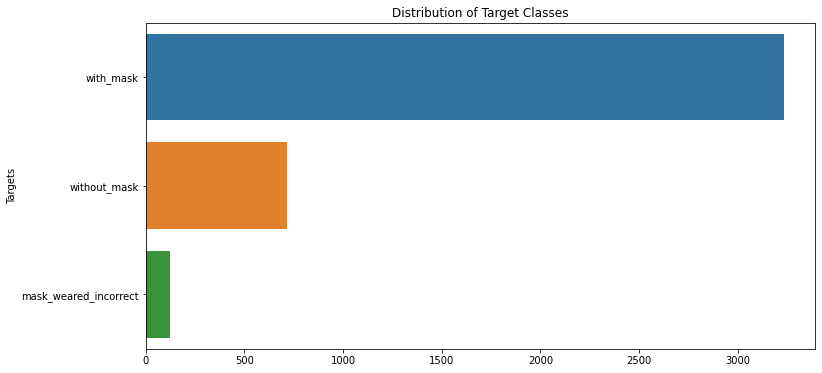

In [12]:
target_count = df['target'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=target_count.values, y=target_count.index)
plt.title("Distribution of Target Classes")
plt.ylabel("Targets")

NB: I went to find another data set of images here so that I could add more without masks to balance the data.

In [13]:
df_all = pd.read_csv('../data/all_image_data.csv')

In [14]:
len(df_all)

6071

Now we have a bigger dataset by just under 2000 more images - all without masks

Text(0, 0.5, 'Targets')

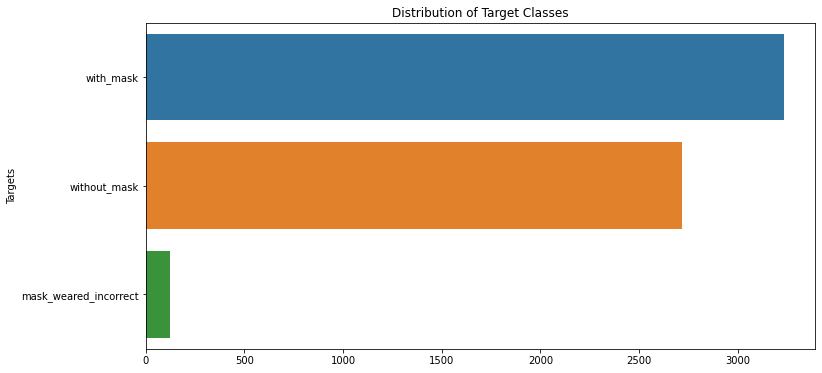

In [16]:
target_count = df_all['target'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=target_count.values, y=target_count.index)
plt.title("Distribution of Target Classes")
plt.ylabel("Targets")

This is a much more balanced dataset between the images with people wearing masks and without.

In [35]:
Image(
    os.path.join(
        '..',
        df_all[df_all['target'] == 'with_mask'].iloc[0]['image_url']
    ),
    width=250,
    height=250
)

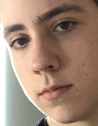

In [29]:
Image(
    os.path.join(
        '..',
        df_all[df_all['target'] == 'without_mask'].iloc[0]['image_url']
    ),
    width=250,
    height=250
)

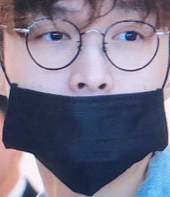

In [30]:
Image(
    os.path.join(
        '..',
        df_all[df_all['target'] == 'mask_weared_incorrect'].iloc[0]['image_url']
    ),
    width=250,
    height=250
)

We are bound to get some pixilated images when we resize as some of the images are picking up faces in the background of the image that are far away. This could be a problem for the CNN, though currently I don't know of a solution. We can come back to this later to try improve performance. I also think I will remove the images of people partially wearing the masks as the count is too imbalanced to produce meaningful results unless we use SMOTE or some other resampling technique.